<a href="https://colab.research.google.com/github/Aishwarya-ps-kumbla/MST_Aish_practice_problems_01/blob/main/aish_casestudy_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#downloading dataset from Kaggle
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
fruit-and-vegetable-image-recognition.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
#extracting the zip file
import zipfile
zip_ref = zipfile.ZipFile('/content/fruit-and-vegetable-image-recognition.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
#importing necessary libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import PIL
import pathlib
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import tensorflow_datasets as tfds

In [8]:
#loading train dataset with batches of 10 from the subdirectories
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=20,
    image_size=(256,256)
)
class_names = train_ds.class_names

Found 3115 files belonging to 36 classes.


In [39]:
#loading test dataset with batches of 10 from the subdirectories
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=10,
    image_size=(256,256),
    seed = 123,
    shuffle=False
)


Found 359 files belonging to 36 classes.


In [10]:
# tune the value dynamically,prefetching and catching
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(buffer_size=32).prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.cache().shuffle(buffer_size=32).prefetch(buffer_size=AUTOTUNE)

In [11]:
#viewing the classnames
print(class_names)

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


In [12]:
len(class_names)

36

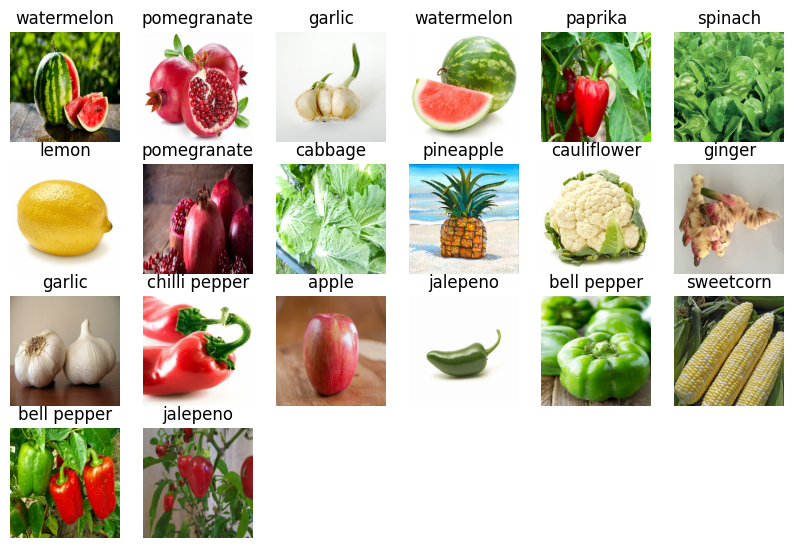

In [13]:
#plotting images of fruits and vegetables
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
  # Iterate over the number of images in the batch
  for i in range(images.shape[0]):
    ax = plt.subplot(6, 6, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [14]:
num_classes = len(class_names)
#augmenting the image view
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.5),
])

# Create an instance of the Sequential class
model = Sequential([
  layers.Rescaling(1./255, input_shape=(256, 256, 3)),
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),#convolution of 256*256images with 16 3*3 filters,with padding
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),#convolution of 256*256images with 32 3*3 filters,with padding
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),#convolution of 256*256images with 64 3*3 filters,with padding
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),#convolution of 256*256images with 128 3*3 filters,with padding
  layers.MaxPooling2D(),
  layers.Flatten(),#flattening the image to 1D
  layers.Dense(256, activation='relu'),#Dense layers of ANN
  layers.Dense(num_classes)
])

In [15]:
#compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                 

In [16]:
#records training metrics for each epoch. This includes the loss and the accuracy
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
156/156 [==============================] - 83s 363ms/step - loss: 3.1052 - accuracy: 0.1185 - val_loss: 2.5195 - val_accuracy: 0.2089
Epoch 2/10
156/156 [==============================] - 4s 28ms/step - loss: 2.6060 - accuracy: 0.2039 - val_loss: 2.1619 - val_accuracy: 0.2869
Epoch 3/10
156/156 [==============================] - 5s 31ms/step - loss: 2.3847 - accuracy: 0.2517 - val_loss: 1.8998 - val_accuracy: 0.3816
Epoch 4/10
156/156 [==============================] - 6s 36ms/step - loss: 2.2559 - accuracy: 0.2931 - val_loss: 1.7822 - val_accuracy: 0.4039
Epoch 5/10
156/156 [==============================] - 5s 30ms/step - loss: 2.1172 - accuracy: 0.3323 - val_loss: 1.6377 - val_accuracy: 0.4457
Epoch 6/10
156/156 [==============================] - 5s 34ms/step - loss: 2.0015 - accuracy: 0.3721 - val_loss: 1.5067 - val_accuracy: 0.4986
Epoch 7/10
156/156 [==============================] - 5s 29ms/step - loss: 1.9379 - accuracy: 0.4006 - val_loss: 1.5257 - val_accuracy: 0.51

In [19]:
# Extract images from validation dataset
test_images, test_labels = tuple(zip(*validation_ds))

# Make predictions
predictions = model.predict(validation_ds)
score = tf.nn.softmax(predictions)

36/36 [==============================] - 0s 6ms/step


In [21]:
#evaluates the performance of the model on the validation dataset
results = model.evaluate(validation_ds)
print("Test loss, Test accuracy:", results)

36/36 [==============================] - 0s 8ms/step - loss: 1.2393 - accuracy: 0.6156
Test loss, Test accuracy: [1.2393113374710083, 0.6155988574028015]


In [22]:
#iterates over the validation_ds dataset, extracts the labels (y) for each batch,
#and concatenates them into a single NumPy array y_test.
y_test = np.concatenate(test_labels)

#extracting the predicted class index from the score array.
y_pred = np.array([np.argmax(s) for s in score])

print(classification_report(y_test, y_pred, target_names=class_names))

               precision    recall  f1-score   support

        apple       0.00      0.00      0.00        10
       banana       0.00      0.00      0.00         9
     beetroot       0.00      0.00      0.00        10
  bell pepper       0.00      0.00      0.00        10
      cabbage       0.25      0.10      0.14        10
     capsicum       0.00      0.00      0.00        10
       carrot       0.10      0.10      0.10        10
  cauliflower       0.00      0.00      0.00        10
chilli pepper       0.00      0.00      0.00        10
         corn       0.00      0.00      0.00        10
     cucumber       0.06      0.10      0.07        10
     eggplant       0.00      0.00      0.00        10
       garlic       0.00      0.00      0.00        10
       ginger       0.00      0.00      0.00        10
       grapes       0.00      0.00      0.00        10
     jalepeno       0.00      0.00      0.00        10
         kiwi       0.00      0.00      0.00        10
        l

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#importing libraries for computer vision
import cv2
import matplotlib.pyplot as plt

In [23]:
#extracts a single batch of images and their corresponding labels from the train_ds dataset.
image_batch, label_batch = next(iter(train_ds))
#predict the classes for the images in image_batch
prediction_batch = model.predict(image_batch)
#obtain probabilities for each class for each image in the batch
score_batch = tf.nn.softmax(prediction_batch)

1/1 [==============================] - 0s 108ms/step


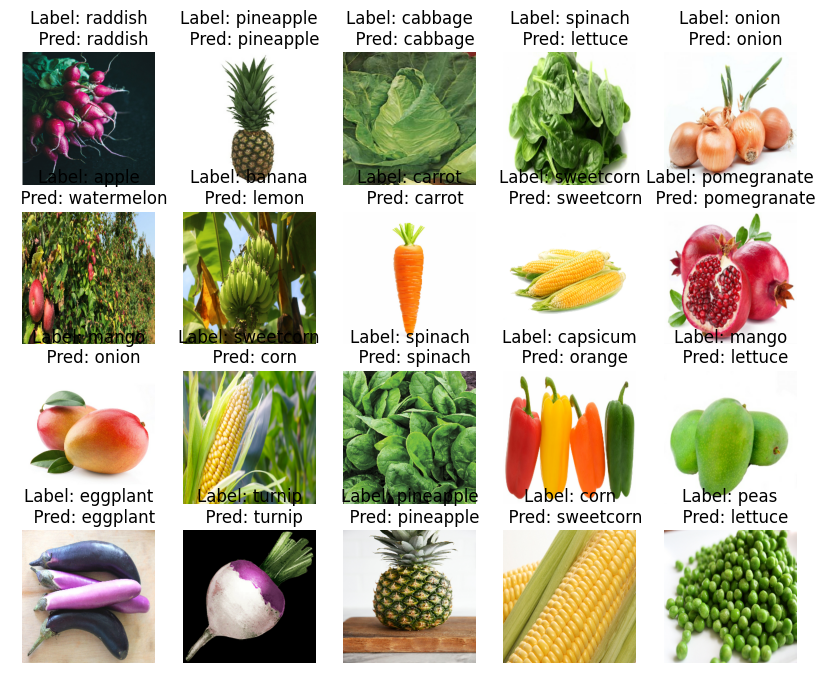

In [65]:
#inspecting how the model is performing on individual images
plt.figure(figsize=(10, 10))
# Iterate over the available images in the batch
for i in range(image_batch.shape[0]):
  ax = plt.subplot(5, 5, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  label = label_batch[i] # Get predicted label index
  plt.title( "Label: " + class_names[label] + "\n  Pred: " + class_names[np.argmax(score_batch[i])])
  plt.axis("off")

The accuracy can be improved by feature extraction and finetuning
